In [1]:
#loading the necessary libraries
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import pandas as pd

In [2]:
#Load the dataset
(trainX,trainy),(testX,testy) = mnist.load_data()

In [3]:
#display train shape
print(trainX.shape, trainy.shape)

(60000, 28, 28) (60000,)


In [4]:
#display test shape
print(testX.shape,testy.shape)

(10000, 28, 28) (10000,)


In [5]:
trainX[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

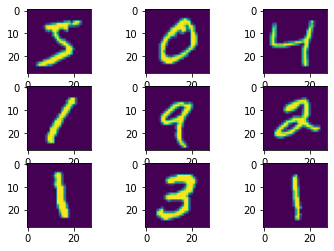

In [7]:
#display images from dataset
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i])
plt.show()

In [8]:
#uilding the model
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt = SGD(momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [9]:
#reshape the data to have a single channel
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))

# one hot encoding
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# normalize the values
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
trainX = train_norm/255.0
testX = test_norm/255.0

# model training
model = define_model()
H = model.fit(trainX,trainy,epochs=5,batch_size=32, validation_data=(testX,testy))

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1749 - accuracy: 0.9454 - val_loss: 0.0727 - val_accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0532 - val_accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0413 - val_accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0440 - val_accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0454 - val_accuracy: 0.9848


In [10]:
#evaluating the model
print(model.evaluate(testX,testy))

313/313 [==============================] - 2s 8ms/step - loss: 0.0454 - accuracy: 0.9848
[0.04537637159228325, 0.9847999811172485]


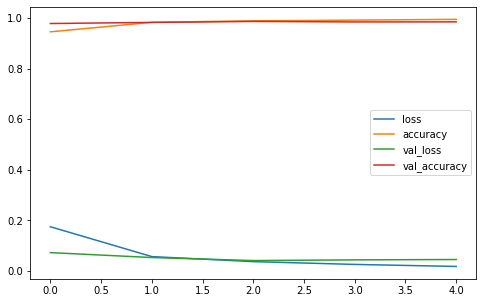

In [11]:
#plotting the graph for accuracy and loss
pd.DataFrame(H.history).plot(figsize=(8,5))
plt.show()